## Посмотрим  и изучим имеющиеся данные

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


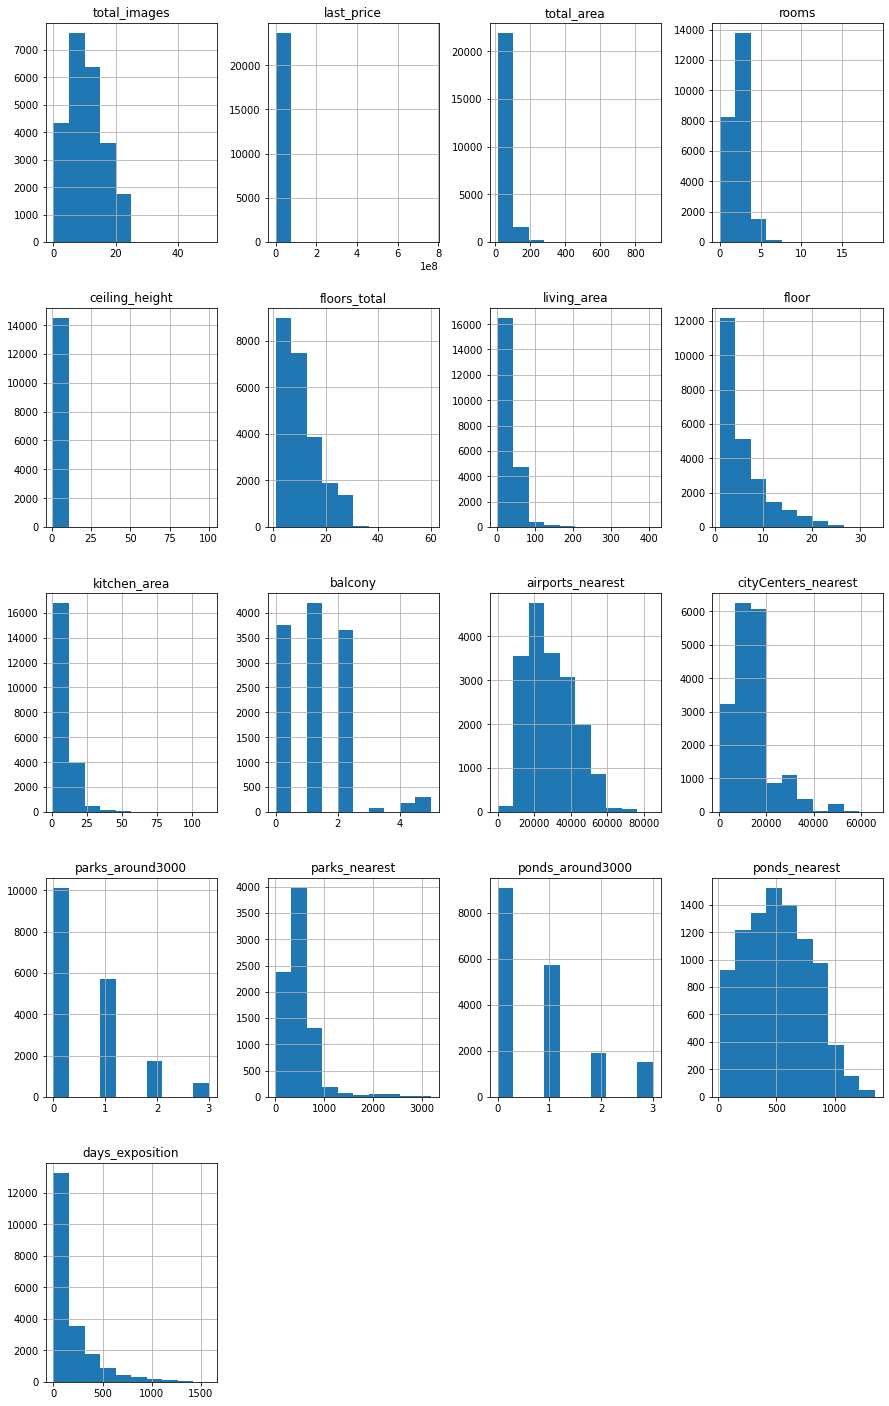

In [5]:
data.hist(figsize=(15, 25));

### вывод

Есть пропуски в сдед. столбцах:

ceiling_height, floors_total, living_area, kitchen_area, balcony, floors_total, is_apartment, locality_name,
airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition

Явных дубликатов нет, неявные нужно проверить

Поменять тип данных в след. столбцах:

first_day_exposition, last_price, floors_total,days_exposition, is_apartment, balcony

В столбце ceiling_height есть экземпляры с высотой потолков, более 10 местров

### Предобработка данных

### замена пропусков

In [6]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['living_area'] = data['living_area'].fillna(data['total_area'] - data['kitchen_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] - data['living_area'])
data['balcony'] = data['balcony'].fillna(0)
data = data.dropna(subset=['floors_total']).reset_index(drop=True) 

Пропущены значения в стобцах:

-ceiling_height (заменил на медианное значение)

-floors_total (пропусков было не значительное количество, просто удалил)

-living_area (где возможно из общей площади вычел площадь кухни, как раз получилась жилая площадь)

-kitchen_area (аналогично жилой площади)

-balcony (пропуски заменены на 0)

### изменение типов данных

In [7]:
#заменить тип данных:
#first_day_exposition, last_price, floors_total,days_exposition, is_apartment, balcony
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%d")
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
#data['days_exposition'] = data['days_exposition'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')

Заменить тип данных:

-first_day_exposition (уместнее использовать в формате DateTime)

-last_price (целочисленные значения в столбце, поэтому тип должен быть INT)

-floors_total (целочисленные значения в столбце, поэтому тип должен быть INT)

-days_exposition (целочисленные значения в столбце, поэтому тип должен быть INT)

-is_apartment (логические значения в столбце, поэтому тип должен быть bool)

-balcony (целочисленные значения в столбце, поэтому тип должен быть INT)

In [8]:
data = data[data['ceiling_height'] < 10].reset_index(drop=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23588 entries, 0 to 23587
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23588 non-null  int64         
 1   last_price            23588 non-null  int64         
 2   total_area            23588 non-null  float64       
 3   first_day_exposition  23588 non-null  datetime64[ns]
 4   rooms                 23588 non-null  int64         
 5   ceiling_height        23588 non-null  float64       
 6   floors_total          23588 non-null  int64         
 7   living_area           22157 non-null  float64       
 8   floor                 23588 non-null  int64         
 9   is_apartment          23588 non-null  bool          
 10  studio                23588 non-null  bool          
 11  open_plan             23588 non-null  bool          
 12  kitchen_area          22157 non-null  float64       
 13  balcony         

### удаление дубликатов

In [10]:
data.duplicated().sum()

0

In [11]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].replace('Мурино', 'поселок Мурино')

In [12]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'С

In [13]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Были не явные дубликаты (поселок-посёлок-городской поселок-поселок городского типа)

Приведены к общему виду

Аномалии в других столбцах: 
    
стоимость квартир, есть около 180 вариантов с ценой более 40 млн, но они 'нормальные', на первый взгляд, в том плане, что есть и элитное жилье

количество комнат, тот же самый принцип, есть 19 кв-тр, в которых более 8 комнат, но это оправданно
    
общая площадь - 226 кв, с S более 200 кв.м

### новые столбцы

In [14]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [15]:
#цена одного 1м²
data['м²_price'] = round(data['last_price'] / data['total_area'])

In [16]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее
data['day_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [17]:
#месяц публикации объявления
data['month_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [18]:
#год публикации объявления
data['year_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [19]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
def type_floor(row):
    last = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == last:
        return 'последний'
    return 'другое'
data['type_of_floor'] = data.apply(type_floor, axis=1)

In [20]:
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений) cityCenters_nearest
data['too_centre'] = round(data['cityCenters_nearest']/1000)
data['too_centre'] = data['too_centre'].fillna(0).astype('int')

In [21]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,м²_price,day_of_publication,month_of_publication,year_of_publication,type_of_floor,too_centre
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другое,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018,первый,19
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другое,14
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015,другое,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другое,8


## Исследовательский анализ данных

<AxesSubplot:ylabel='Frequency'>

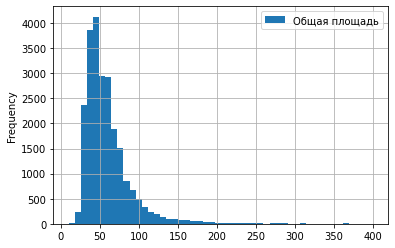

In [22]:
#общая площадь
data.plot(
    kind='hist', 
    y='total_area',
    histtype='bar',
    range=(10, 400),
    bins=50,
    label='Общая площадь',
    grid=True,
    legend=True
)

Больше всего квартир с площадью от 40 до 60 кв.м

<AxesSubplot:ylabel='Frequency'>

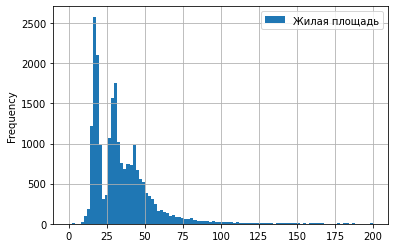

In [23]:
#жилая площадь
data.plot(
    kind='hist', 
    y='living_area',
    histtype='bar',
    range=(0, 200),
    bins=100,
    label='Жилая площадь',
    grid=True,
    legend=True
)

На жилую часть квартир прихродиться два пика 17-20 кв.м и 28-30 кв.м

<AxesSubplot:ylabel='Frequency'>

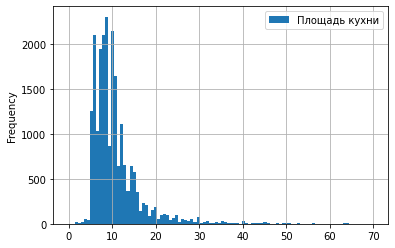

In [24]:
#площадь кухни
data.plot(
    kind='hist', 
    y='kitchen_area',
    histtype='bar',
    range=(0, 70),
    bins=100,
    label='Площадь кухни',
    grid=True,
    legend=True
)

Площадь большинства кухонь до 12 кв.м

<AxesSubplot:ylabel='Frequency'>

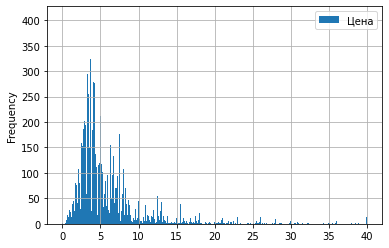

In [25]:
#цена объекта
data['last_price'] = data['last_price'] / 1000000
data.plot(
    kind='hist', 
    y='last_price',
    histtype='bar',
    range=(0,40),
    bins=1000,
    label='Цена',
    grid=True,
    legend=True
)

Цены на квартиры распределены нормально, больше всего квартир до 5 млн.руб

<AxesSubplot:ylabel='Frequency'>

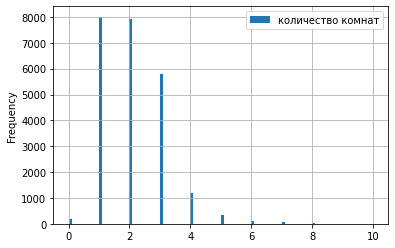

In [26]:
#количество комнат
data.plot(
    kind='hist', 
    y='rooms',
    histtype='bar',
    range=(0,10),
    bins=100,
    label='количество комнат',
    grid=True,
    legend=True
)

1-ых и 2-ых квартир больше всего

<AxesSubplot:ylabel='Frequency'>

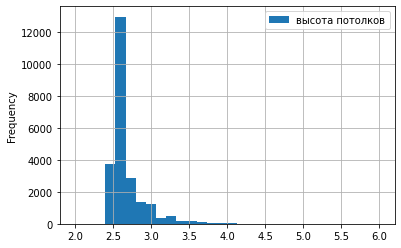

In [27]:
#высота потолков
data.plot(
    kind='hist', 
    y='ceiling_height',
    histtype='bar',
    range=(2,6),
    bins=30,
    label='высота потолков',
    grid=True,
    legend=True
)

2.6м- 2.7м самая встречаемая высота потолков 

<AxesSubplot:ylabel='Frequency'>

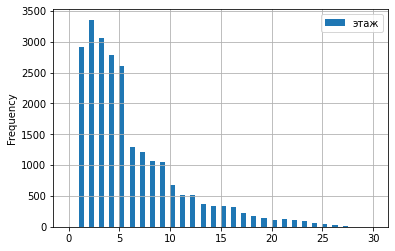

In [28]:
#этаж квартиры
data.plot(
    kind='hist', 
    y='floor',
    histtype='bar',
    range=(0,30),
    bins=60,
    label='этаж',
    grid=True,
    legend=True
)

Из представленных квартир больше всего находится до 5 этажа

<AxesSubplot:ylabel='Frequency'>

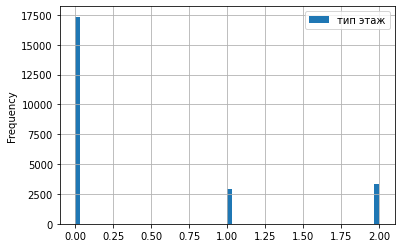

In [29]:
#тип этажа квартиры («первый», «последний», «другой»
def number_type(number):
    if number == 'первый':
        return(1)
    if number == 'последний':
        return(2)
    return (0)
data['type_number'] = data['type_of_floor'].apply(number_type)
data.plot(
    kind='hist', 
    y='type_number',
    histtype='bar',
    range=(0,2),
    bins=60,
    label='тип этаж',
    grid=True,
    legend=True
)

<AxesSubplot:ylabel='Frequency'>

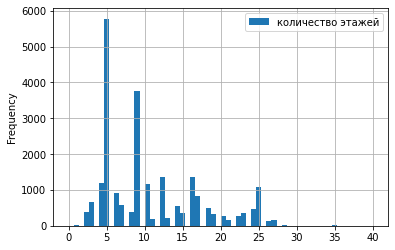

In [30]:
#общее количество этажей в доме
data.plot(
    kind='hist', 
    y='floors_total',
    histtype='bar',
    range=(0,40),
    bins=60,
    label='количество этажей',
    grid=True,
    legend=True
)

Больше всего домов, в которых всего 5 этажей

<AxesSubplot:ylabel='Frequency'>

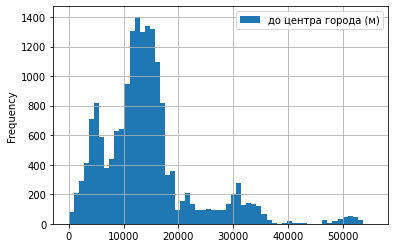

In [31]:
#расстояние до центра города в метрах
data.plot(
    kind='hist', 
    y='cityCenters_nearest',
    histtype='bar',
    range=(0,55500),
    bins=60,
    label='до центра города (м)',
    grid=True,
    legend=True
)

Больше всего квартир находится от 12 до 18 тыс.м

<AxesSubplot:ylabel='Frequency'>

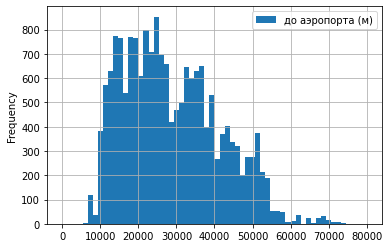

In [32]:
#расстояние до ближайшего аэропорта
data.plot(
    kind='hist', 
    y='airports_nearest',
    histtype='bar',
    range=(0,80000),
    bins=60,
    label='до аэропорта (м)',
    grid=True,
    legend=True
)

Больше всего квартир находится от 15 до 25 тыс.м до аэропорта

<AxesSubplot:ylabel='Frequency'>

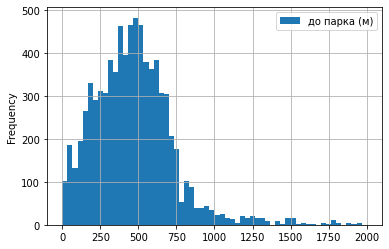

In [33]:
#расстояние до ближайшего парка
data.plot(
    kind='hist', 
    y='parks_nearest',
    histtype='bar',
    range=(0,2000),
    bins=60,
    label='до парка (м)',
    grid=True,
    legend=True
)

у большинства квартир есть парк в радиусе 500м

<AxesSubplot:ylabel='Frequency'>

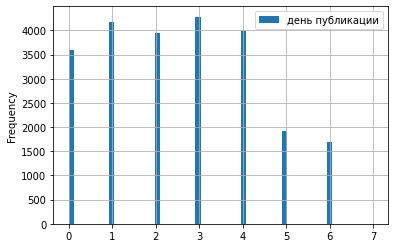

In [34]:
#день публикации объявления
data.plot(
    kind='hist', 
    y='day_of_publication',
    histtype='bar',
    range=(0,7),
    bins=60,
    label='день публикации',
    grid=True,
    legend=True
)

Объявления выкладывают во вторник и четверг чаще всего

<AxesSubplot:ylabel='Frequency'>

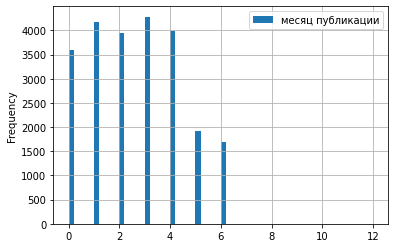

In [35]:
#месяц публикации объявления
data.plot(
    kind='hist', 
    y='day_of_publication',
    histtype='bar',
    range=(0,12),
    bins=60,
    label='месяц публикации',
    grid=True,
    legend=True
)

Все объявления выложены в первом полугодии

Медиана: 95.0
Среднее: 181.0


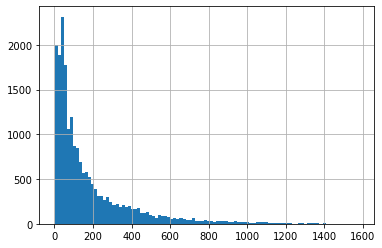

In [36]:
data['days_exposition'].hist(bins=100)
print('Медиана:',data['days_exposition'].median().round())
print('Среднее:',data['days_exposition'].mean().round())

В среднем, для продажи квартиры понадобится около 180 дней

аномально долгие выше 1100 дней

быстрыми можно считать менее 90 дней


Рассмотрим зависит ли цена от:
 - общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

0.65


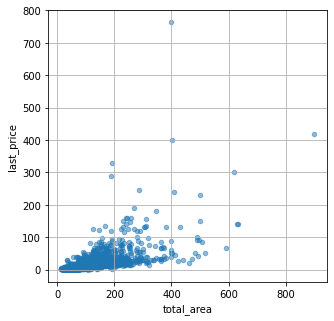

In [38]:
#цена от общей площади
data.plot(x='total_area', y='last_price', kind='scatter',alpha= 0.5, figsize=(5, 5),grid=True)
print(data['last_price'].corr(data['total_area']).round(2))

0.57


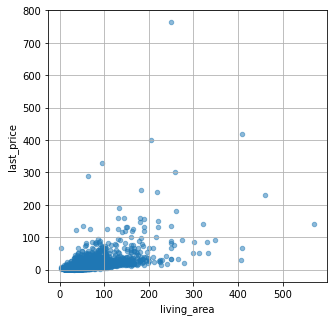

In [39]:
#цена от жилой площади
data.plot(x='living_area', y='last_price', kind='scatter',alpha= 0.5, figsize=(5, 5),grid=True)
print(data['last_price'].corr(data['living_area']).round(2))

0.49


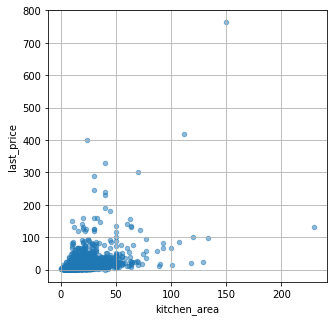

In [40]:
#цена от площади кухни
data.plot(x='kitchen_area', y='last_price', kind='scatter',alpha= 0.5, figsize=(5, 5),grid=True)
print(data['last_price'].corr(data['kitchen_area']).round(2))

0.36


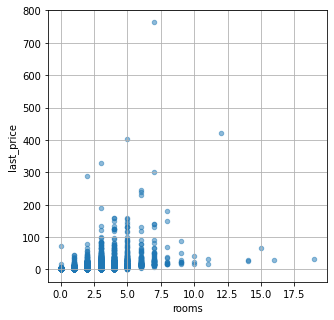

In [41]:
#цена от количества комнат
data.plot(x='rooms', y='last_price',kind='scatter',alpha= 0.5, figsize=(5, 5),grid=True)
print(data['last_price'].corr(data['rooms']).round(2))

0.0022


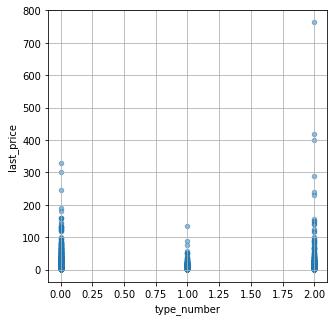

In [42]:
#цена от этажа, на котором расположена квартира
data.plot(x='type_number', y='last_price',kind='scatter',alpha= 0.5, figsize=(5, 5),grid=True)
print(data['last_price'].corr(data['type_number']).round(4))

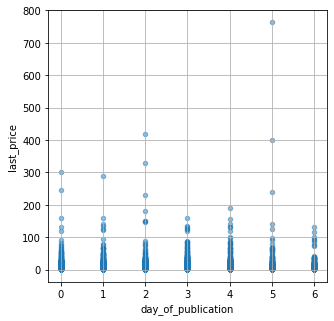

In [43]:
#цена от дня недели размещения
data.plot(x='day_of_publication', y='last_price',kind='scatter',alpha= 0.5, figsize=(5, 5),grid=True);

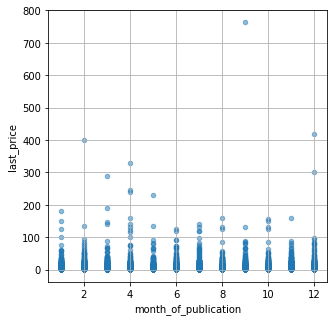

In [44]:
#цена от месяца размещения year_of_publication
data.plot(x='month_of_publication', y='last_price',kind='scatter',alpha= 0.5, figsize=(5, 5),grid=True);

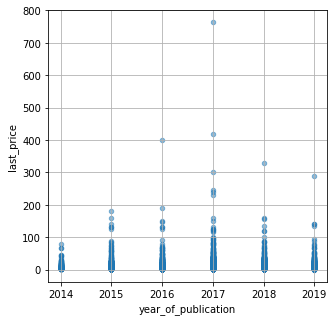

In [45]:
#цена от года размещения 
data.plot(x='year_of_publication', y='last_price',kind='scatter',alpha= 0.5, figsize=(5, 5),grid=True);

Из рассматриваемых параметров, больше всего на цену влияет общая площадь квартиры

In [46]:
#Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
#Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
#Эти данные можно найти по имени в столбце locality_name.

In [47]:
most_citizen = data.query(
    'locality_name == ["Санкт-Петербург","поселок Мурино","поселок Шушары","Всеволожск","Пушкин","Колпино","поселок Парголово","Гатчина","деревня Кудрово","Выборг"]'
)

In [48]:
most_citizen = most_citizen.pivot_table(index='locality_name', values='м²_price', aggfunc='mean')
most_citizen.sort_values('м²_price', ascending=False)

,м²_price
locality_name,
Санкт-Петербург,114847.734331
Пушкин,103125.818428
деревня Кудрово,92473.588629
поселок Парголово,90175.886850
поселок Мурино,86018.109589
поселок Шушары,78551.359909
Колпино,75424.571006
Гатчина,68757.643791
Всеволожск,68654.474874


Населённый пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург	(114848 р.)

Населённый пункт с самой низкой стоимостью квадратного метра - Выборг	(58142 р.)

In [49]:
#Ранее вы посчитали расстояние до центра в километрах. 
#Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. 
#Опишите, как стоимость объектов зависит от расстояния до центра города.

In [50]:
km_price = data.query('locality_name == "Санкт-Петербург"')
mean_price = km_price.pivot_table(index='too_centre', values='last_price', aggfunc='mean')
mean_price


,last_price
too_centre,
0,20.707663
1,21.206721
2,17.788320
3,11.146436
4,13.309091
5,14.455996
6,15.338418
7,14.775153
8,9.961374


В центре города самое дорогое жилье, чем дальше, тем цена становиться меньше

## Общий вывод

Больше всего квартир с площадью от 40 до 60 кв.м
На жилую часть квартир прихродиться два пика 17-20 кв.м и 28-30 кв.м
Площадь большинства кухонь до 12 кв.м
Цены на квартиры распределены нормально, больше всего квартир до 5 млн.руб
1-ых и 2-ых квартир больше всего
2.6м- 2.7м самая встречаемая высота потолков 
Из представленных квартир больше всего находится до 5 этажа
Больше всего домов, в которых всего 5 этажей

расстояние до центра города: больше всего квартир находится от 12 до 18 тыс.м

расстояние до ближайшего аэропорта: больше всего квартир находится от 15 до 25 тыс.м

расстояние до ближайшего парка:у большинства квартир есть парк в радиусе 500м

день и месяц публикации объявления: объявления чаще всего выкладывают во вторник и четверг

Все объявления выложены в первом полугодии

В центре города самое дорогое жилье, чем дальше, тем цена становиться меньше

Населённый пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург	(114848 р.)

Населённый пункт с самой низкой стоимостью квадратного метра - Выборг	(58142 р.)

Из рассматренных параметров, больше всего на цену влияет общая площадь квартиры

В среднем, для продажи квартиры понадобится около 180 дней,аномально долгие выше 1100 дней, быстрыми можно считать менее 90 дней
